In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset_new.csv")
df.shape

(187, 15)

In [3]:
df.sample(3)

,month,month-year,overall,public_housing,1-room_2-room,3-room,4-room,5-room_and_executive,private_housing,private_apts_and_condo,landed_properties,others,mean_temp,total_rainfall,mean_rh
183,2020-04-01,2020-04,669.9,383.4,13.3,66.8,160.6,142.6,285.7,187.7,97.9,0.9,28.9,188.0,76.4
32,2007-09-01,2007-09,513.6,315.6,6.1,58.4,124.6,126.4,197.0,118.1,78.9,1.0,27.8,149.0,83.3
129,2015-10-01,2015-10,643.6,379.3,10.7,67.7,154.9,145.9,263.4,167.7,95.7,0.9,28.7,87.2,75.4


In [4]:
df.columns.values

array(['month', 'month-year', 'overall', 'public_housing',
       '1-room_2-room', '3-room', '4-room', '5-room_and_executive',
       'private_housing', 'private_apts_and_condo', 'landed_properties',
       'others', 'mean_temp', 'total_rainfall', 'mean_rh'], dtype=object)

In [5]:
df[['month-year', 'public_housing',
       'private_housing', 'mean_temp', 'total_rainfall', 'mean_rh']].head(3)

,month-year,public_housing,private_housing,mean_temp,total_rainfall,mean_rh
0,2005-01,280.7,166.2,26.6,163.2,83.3
1,2005-02,270.8,165.5,28.5,8.4,77.7
2,2005-03,295.4,183.3,28.5,82.4,80.3


In [6]:
df[['month-year', 'public_housing',
       'private_housing', 'mean_temp', 'total_rainfall', 'mean_rh']].describe()

,public_housing,private_housing,mean_temp,total_rainfall,mean_rh
count,187.000000,187.000000,187.000000,187.000000,187.000000
mean,339.652406,227.499465,27.890374,172.655615,81.252941
std,36.751159,33.238376,0.736026,109.296751,3.887287
min,270.800000,165.500000,26.100000,0.200000,72.000000
25%,314.550000,201.750000,27.300000,89.450000,78.500000
50%,337.800000,225.900000,28.000000,158.400000,81.500000
75%,363.850000,251.200000,28.450000,237.000000,84.200000
max,515.200000,370.600000,29.400000,765.900000,88.500000


In [7]:
df2=df
df2['log_rain']=np.log(df.total_rainfall)

Text(0.5, 1.0, 'Energy Consumption of Public Housing')

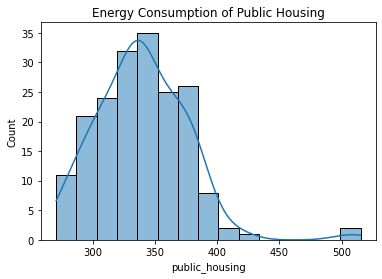

In [8]:
sns.histplot(x='public_housing', data=df,kde=True).set_title("Energy Consumption of Public Housing")

Text(0.5, 1.0, 'Mean Temperature')

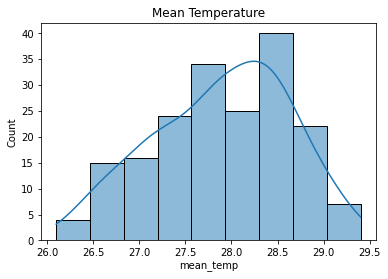

In [9]:
sns.histplot(x='mean_temp', data=df,kde=True).set_title("Mean Temperature")

Text(0.5, 1.0, 'Total Rainfall')

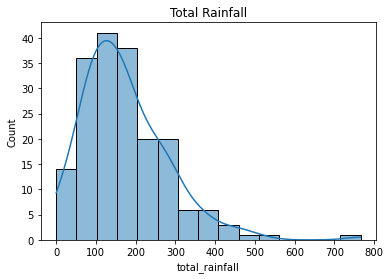

In [10]:
sns.histplot(x='total_rainfall', data=df,kde=True).set_title("Total Rainfall")

Text(0.5, 1.0, 'Log of Total Rain')

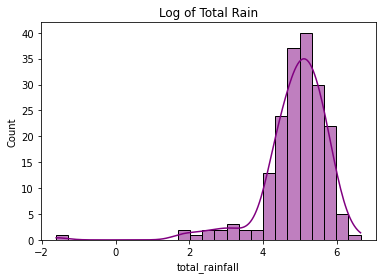

In [11]:
sns.histplot(x=np.log(df['total_rainfall']), data=df,kde=True,color="purple").set_title("Log of Total Rain")

Text(0.5, 1.0, 'Mean Relative Humidity')

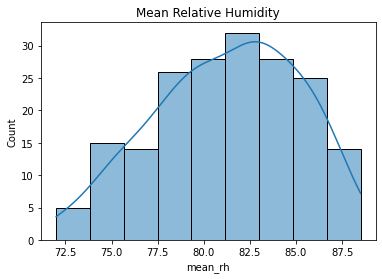

In [12]:
sns.histplot(x='mean_rh', data=df,kde=True).set_title("Mean Relative Humidity")

In [13]:
dfl = df[['public_housing','private_housing','mean_temp','total_rainfall','mean_rh']]

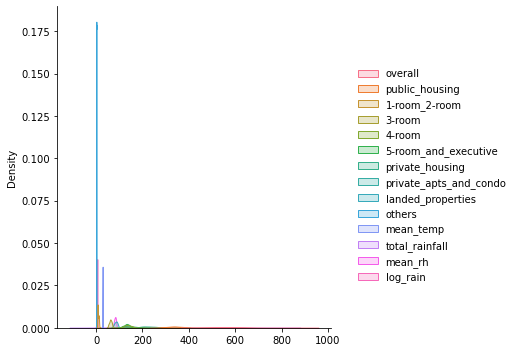

In [14]:
sns.displot(data=df, kind='kde', fill=True)

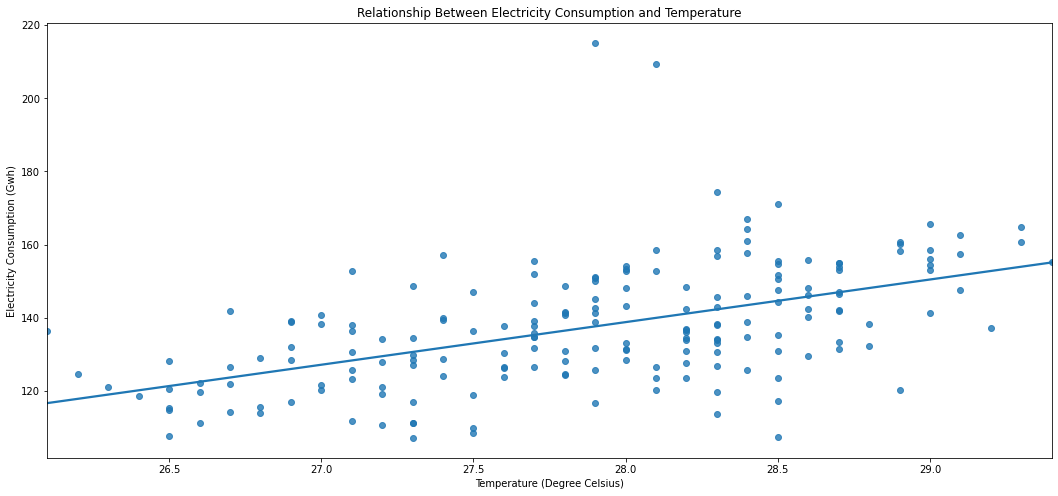

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(18,8)
sns.regplot(y='4-room',x='mean_temp',data=df,ci=1,fit_reg=True)
plt.ylabel('Electricity Consumption (Gwh)')
plt.xlabel('Temperature (Degree Celsius)')
plt.title('Relationship Between Electricity Consumption and Temperature')
plt.show()

# Regression - with constant

In [16]:
#try multiple regression
import statsmodels.api as sm
x=df[['mean_temp','total_rainfall','mean_rh']]
y=df['public_housing']
X = sm.add_constant(x)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         public_housing   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     37.06
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           9.22e-19
Time:                        19:15:53   Log-Likelihood:                -894.44
No. Observations:                 187   AIC:                             1797.
Df Residuals:                     183   BIC:                             1810.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -84.8644    143.415     -0.592      0.555    -367.823     198.094
mean_temp         24.6292      3.806      6.472      0.000      17.121      32.138
total_rainfall     0.1117      0.026      4.315      0.000       0.061       0.163
mean_rh           -3.4669      0.766     -4.526      0.000      -4.978      -1.956
==============================================================================
Omnibus:                       84.031   Durbin-Watson:                   0.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              604.024
Skew:                           1.505   Prob(JB):                    6.88e-132
Kurtosis:                      11.274   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression - no constant, and using log_rain

## public housing

In [17]:
#try multiple regression
import statsmodels.api as sm
x=df2[['mean_temp','log_rain','mean_rh']]
y=df2['public_housing']
#X = sm.add_constant(x)
est_nocons = sm.OLS(y, x).fit()
est_nocons.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         public_housing   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              9113.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):                   8.83e-200
Time:                        19:15:53   Log-Likelihood:                         -888.01
No. Observations:                 187   AIC:                                      1782.
Df Residuals:                     184   BIC:                                      1792.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mean_temp     21.1394      1.176     17.971      0.000      18.819      23.460
log_rain      15.7315      2.726      5.770      0.000      10.352      21.111
mean_rh       -4.0227      0.486     -8.285      0.000      -4.981      -3.065
==============================================================================
Omnibus:                       87.326   Durbin-Watson:                   0.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              632.520
Skew:                           1.578   Prob(JB):                    4.47e-138
Kurtosis:                      11.439   Cond. No.                         116.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Diagnostics, partial regression

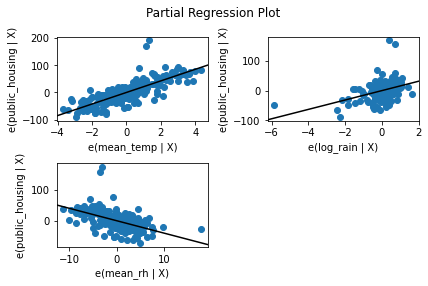

In [19]:
fig = sm.graphics.plot_partregress_grid(est_nocons)
fig.tight_layout(pad=1.0)

Diagnostics, partial regression

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vars_r = df2[['mean_temp','log_rain','mean_rh']]
vif["VIF Factor"] = [variance_inflation_factor(vars_r.values, i) for i in range(vars_r.shape[1])]
vif["features"] = vars_r.columns

vif

,VIF Factor,features
0,254.013630,mean_temp
1,43.380854,log_rain
2,367.915209,mean_rh


## private housing

In [21]:
#try for private housing
import statsmodels.api as sm
x=df2[['mean_temp','log_rain','mean_rh']]
y=df2['private_housing']
#X = sm.add_constant(x)
est_pri = sm.OLS(y, x).fit()
est_pri.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        private_housing   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              5094.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):                   9.43e-177
Time:                        19:15:54   Log-Likelihood:                         -867.84
No. Observations:                 187   AIC:                                      1742.
Df Residuals:                     184   BIC:                                      1751.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mean_temp     17.8273      1.056     16.881      0.000      15.744      19.911
log_rain      13.8602      2.448      5.663      0.000       9.031      18.689
mean_rh       -4.1541      0.436     -9.530      0.000      -5.014      -3.294
==============================================================================
Omnibus:                       65.274   Durbin-Watson:                   0.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.757
Skew:                           1.293   Prob(JB):                     1.61e-59
Kurtosis:                       8.297   Cond. No.                         116.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Diagnostics, partial regression

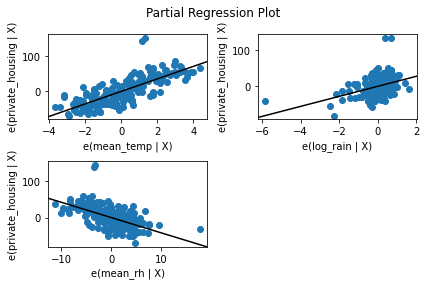

In [32]:
fig = sm.graphics.plot_partregress_grid(est_pri)
fig.tight_layout(pad=1.0)

# Find out impact of raising 1Deg

### public housing

In [18]:
#cal usage rates
# assume temp is 28, rain is 200, rh 77
t_1 = 21.1394*28+15.7315*np.log(200)-4.0227*77

#if temp is 29??
t_2 = 21.1394*29+15.7315*np.log(200)-4.0227*77

p_change= (t_2-t_1)/t_1 *100
print(t_1, t_2) 
print(f"For public housing, if temp raise by 1, the electricity usage will raise by {p_change:.2f}%")

365.50577965185045 386.64517965185047
For public housing, if temp raise by 1, the electricity usage will raise by 5.78%


### private housing

In [22]:
#cal usage rates
# assume temp is 28, rain is 200, rh 77
tp_1 = 17.8273*28+13.8602*np.log(200)-4.1541*77

#if temp is 29??
tp_2 = 17.8273*29+13.8602*np.log(200)-4.1541*77

p_change= (tp_2-tp_1)/tp_1 *100
print(tp_1, tp_2) 
print(f"For private housing, if temp raise by 1, the electricity usage will raise by {p_change:.2f}%")

252.7344383638291 270.56173836382925
For private housing, if temp raise by 1, the electricity usage will raise by 7.05%


In [23]:
i=26.5
s=[25,26,27,28,29,30]
diff=[]
priv=[]

#priv
for num in s:
    x=17.8273*num+13.8602*np.log(200)-4.1541*77
    print(x)
    diff.append(x)
 #pub   
for num in s:
    x=21.1394*num+15.7315*np.log(200)-4.0227*77
    print(x)
    priv.append(x)
    


199.2525383638291
217.07983836382925
234.90713836382918
252.7344383638291
270.56173836382925
288.3890383638292
302.0875796518504
323.2269796518504
344.3663796518504
365.50577965185045
386.64517965185047
407.78457965185027


In [24]:
c=[0,1,2,3,4,5]

In [25]:
tp = {'temp':s,'raise':c,'pub':priv,'priv':diff}

In [26]:
tp_c = pd.DataFrame(tp)

In [27]:
tp_c['public']=100*tp_c['pub'].pct_change()

In [28]:
tp_c['private']=100*tp_c['priv'].pct_change()

In [29]:
tp_c

,temp,raise,pub,priv,public,private
0,25,0,302.08758,199.252538,NaN,NaN
1,26,1,323.22698,217.079838,6.997772,8.947088
2,27,2,344.36638,234.907138,6.540110,8.212324
3,28,3,365.50578,252.734438,6.138636,7.589084
4,29,4,386.64518,270.561738,5.783602,7.053768
5,30,5,407.78458,288.389038,5.467390,6.588995


In [30]:
tp_c.melt(id_vars='raise', value_vars=['public','private'])

,raise,variable,value
0,0,public,NaN
1,1,public,6.997772
2,2,public,6.540110
3,3,public,6.138636
4,4,public,5.783602
5,5,public,5.467390
6,0,private,NaN
7,1,private,8.947088
8,2,private,8.212324
9,3,private,7.589084


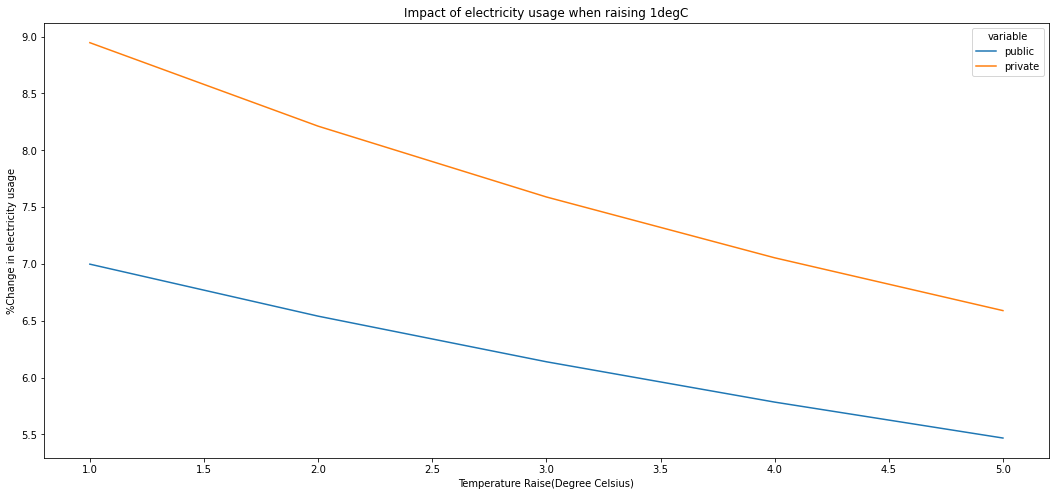

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(18,8)


sns.lineplot(x='raise', y='value', data=tp_c.melt(id_vars='raise', value_vars=['public','private']), hue='variable')
plt.ylabel('%Change in electricity usage')
plt.xlabel('Temperature Raise(Degree Celsius)')
plt.title('Impact of electricity usage when raising 1degC')
plt.show()